Analysis --> Feature engg --> Model --> Web application

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
pd.set_option("display.max_columns", None)

In [164]:
sns.set_style("whitegrid")

In [165]:
df=pd.read_csv("german_credit_data.csv")

In [166]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [167]:
df["Age"].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [168]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [169]:
df.shape


(1000, 11)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [171]:
df.describe(include="all")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [172]:
df["Job"].unique()

array([2, 1, 3, 0])

In [173]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [174]:
df.duplicated().sum()

np.int64(0)

In [175]:
df=df.dropna().reset_index(drop=True)

In [176]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [177]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [178]:
df.drop(columns="Unnamed: 0",inplace=True)

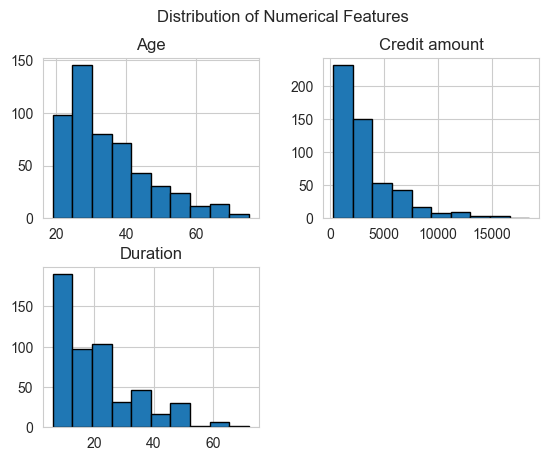

In [179]:
df[["Age","Credit amount", "Duration"]].hist(bins=10, edgecolor="black")
plt.suptitle("Distribution of Numerical Features");

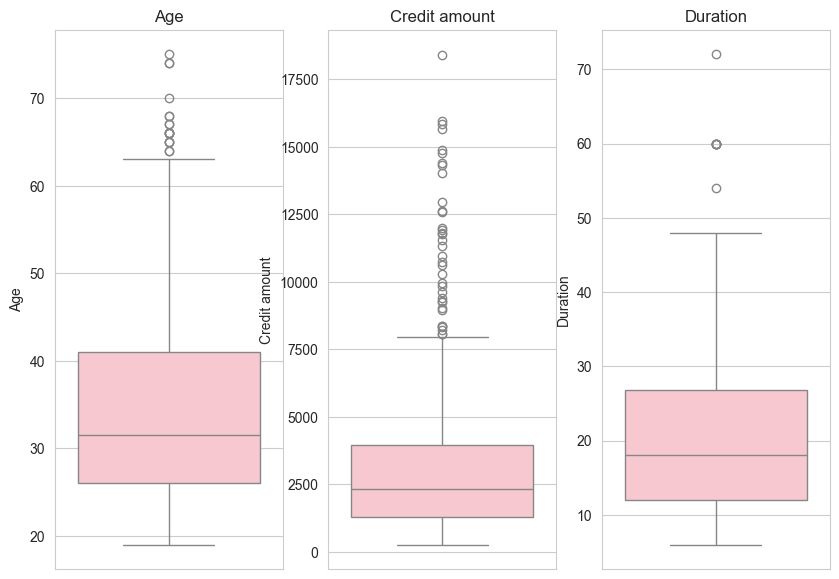

In [180]:
plt.figure(figsize=(10,7))
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col],color="pink")
    plt.title(col)
plt.tight_layout
plt.show()

In [181]:
df.query("Duration>=60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [182]:
categorical_col=["Sex","Job","Housing","Saving accounts","Checking account","Purpose","Risk"]

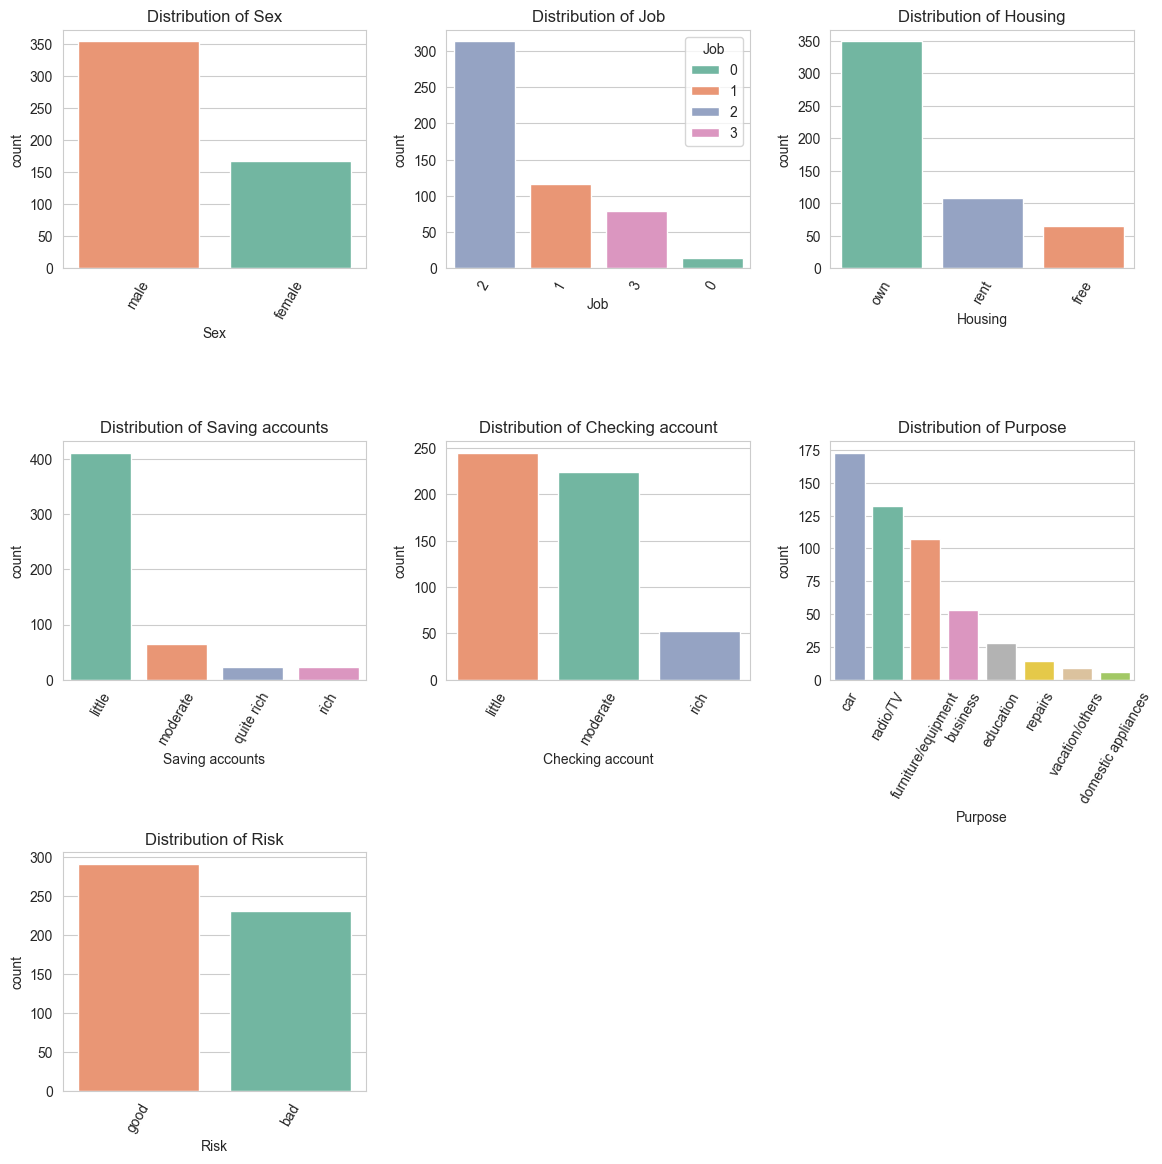

In [183]:
plt.figure(figsize=(12, 12))
for i,col in enumerate(categorical_col):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col, palette="Set2",hue=col, order=df[col].value_counts().index)
    plt.title("Distribution of {}".format(col))
    plt.xticks(rotation=60)
plt.tight_layout(pad=2)
plt.show();

In [184]:
corr=df[["Age","Job","Credit amount","Duration"]].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


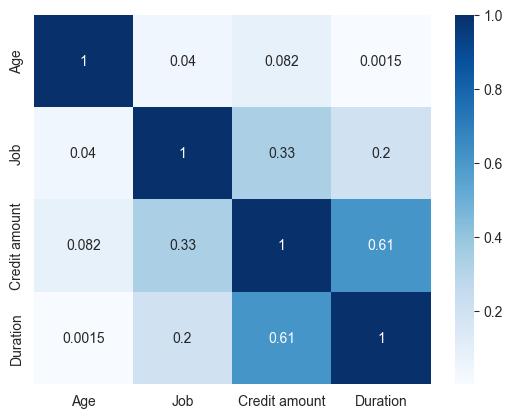

In [185]:
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()

In [186]:
df.groupby("Job")["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [187]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [188]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


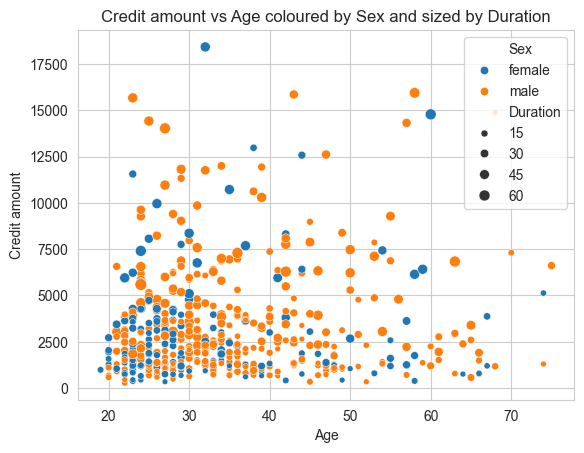

In [189]:
sns.scatterplot(data=df,x="Age", y="Credit amount", hue="Sex", size="Duration")
plt.title("Credit amount vs Age coloured by Sex and sized by Duration")
plt.show();


C:\Users\arish\AppData\Local\Temp\ipykernel_23564\2967911905.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Saving accounts",y="Credit amount",palette="Pastel2")


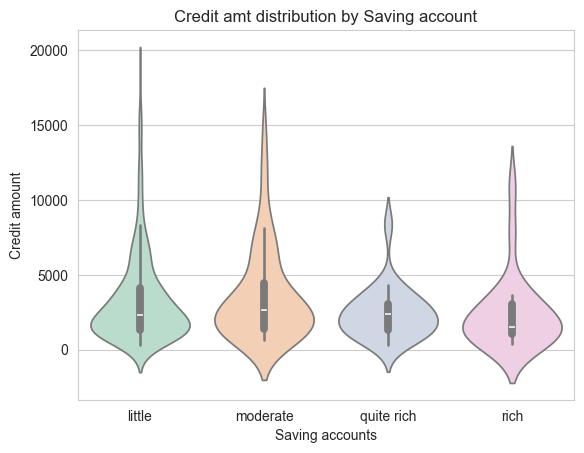

In [190]:
sns.violinplot(data=df, x="Saving accounts",y="Credit amount",palette="Pastel2")
plt.title("Credit amt distribution by Saving account")
plt.show();

In [191]:
df["Risk"].value_counts(normalize=True)*100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

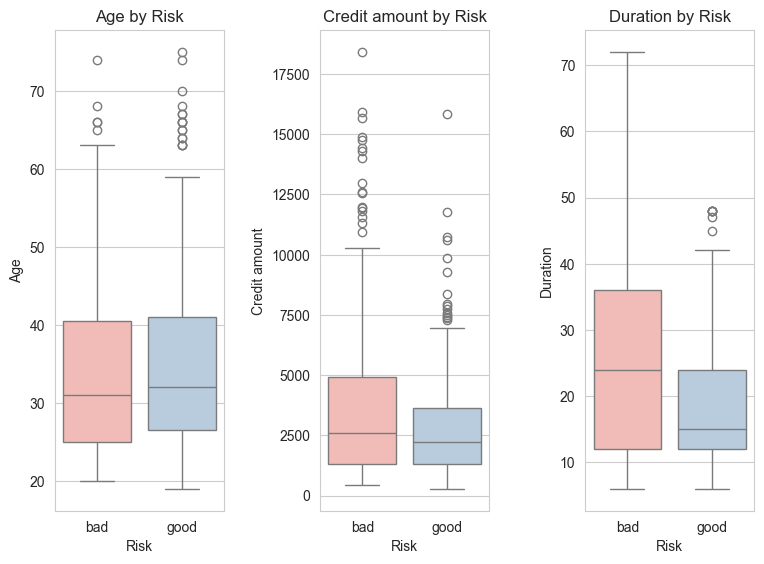

In [192]:
plt.figure(figsize=(8,6))
for i,col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x="Risk", y=col,hue="Risk", palette="Pastel1")
    plt.title("{} by Risk".format(col))
plt.tight_layout(pad=2)
plt.show()

In [193]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [194]:
categorical_col

['Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Purpose',
 'Risk']

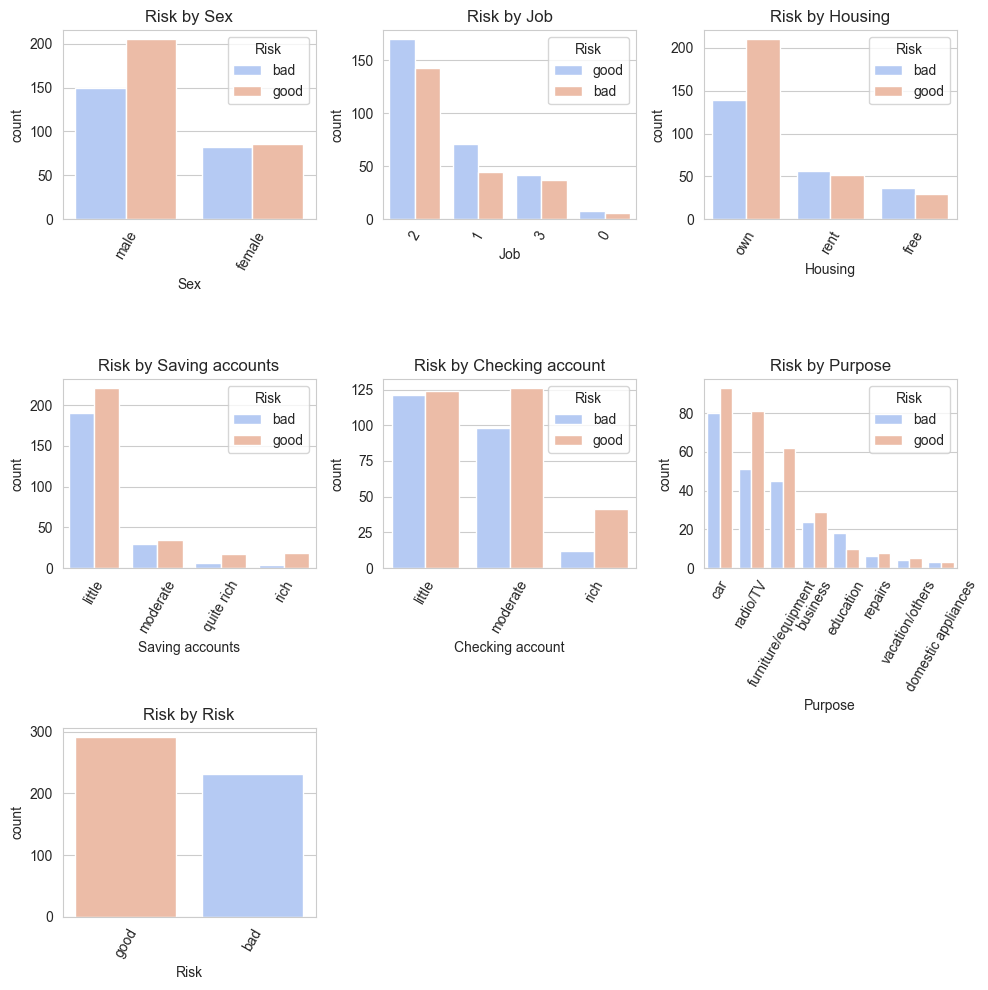

In [208]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_col):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df, x=col, palette="coolwarm", hue="Risk", order=df[col].value_counts().index)
    plt.title("Risk by {}".format(col))
    plt.xticks(rotation=60)
plt.tight_layout()


In [223]:
features= ["Sex","Age","Job","Housing", "Credit amount","Saving accounts","Checking account","Duration"]

In [232]:
target="Risk"

In [233]:
df_model=df[features + [target]].copy()
df_model.head(10)

,Sex,Age,Job,Housing,Credit amount,Saving accounts,Checking account,Duration,Risk
0,female,22,2,own,5951,little,moderate,48,bad
1,male,45,2,free,7882,little,little,42,good
2,male,53,2,free,4870,little,little,24,bad
3,male,35,3,rent,6948,little,moderate,36,good
4,male,28,3,own,5234,little,moderate,30,bad
5,female,25,2,rent,1295,little,moderate,12,bad
6,female,24,2,rent,4308,little,little,48,bad
7,female,22,2,own,1567,little,moderate,12,good
8,male,60,1,own,1199,little,little,24,bad
9,female,28,2,rent,1403,little,little,15,good


In [234]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [235]:
category_cols= df_model.select_dtypes(include='object').columns.drop("Risk")

In [236]:
category_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [237]:
le_dict={}


In [238]:
for col in category_cols:
    le=LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])  #save model
    joblib.dump(le, f"{col}_encoder.pkl")

In [239]:
le_target= LabelEncoder()

In [241]:
df_model[target]= le_target.fit_transform(df_model[target])

In [245]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [246]:
joblib.dump(le_target,"target_encoder.pkl" )

['target_encoder.pkl']

In [247]:
df_model.head()

,Sex,Age,Job,Housing,Credit amount,Saving accounts,Checking account,Duration,Risk
0,0,22,2,1,5951,0,1,48,0
1,1,45,2,0,7882,0,0,42,1
2,1,53,2,0,4870,0,0,24,0
3,1,35,3,2,6948,0,1,36,1
4,1,28,3,1,5234,0,1,30,0


In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X = df_model.drop(target, axis=1)
y= df_model[target]

In [250]:
X

,Sex,Age,Job,Housing,Credit amount,Saving accounts,Checking account,Duration
0,0,22,2,1,5951,0,1,48
1,1,45,2,0,7882,0,0,42
2,1,53,2,0,4870,0,0,24
3,1,35,3,2,6948,0,1,36
4,1,28,3,1,5234,0,1,30
...,...,...,...,...,...,...,...,...
517,1,48,1,1,1743,0,1,24
518,1,30,3,1,3959,0,0,36
519,1,40,3,1,3857,0,0,30
520,1,23,2,0,1845,0,0,45


In [251]:
y

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [254]:
X_train.shape

(417, 8)

In [255]:
X_test.shape

(105, 8)

In [259]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [260]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid=GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model= grid.best_estimator_
    y_pred= best_model.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [263]:
dt= DecisionTreeClassifier(random_state=1, class_weight= "balanced")
dt_param_grid={
    "max_depth": [3,5,7,10,None],
    "min_samples_split":[2,5,10],
    "min_samples_leaf": [1,2,4]
}


In [264]:
best_dt, acc_dt, params_dt= train_model(dt, dt_param_grid,X_train, y_train, X_test, y_test)

In [273]:
print("Decision Tree Accuracy", acc_dt)


Decision Tree Accuracy 0.5904761904761905


In [269]:
print("Best parameters:",params_dt)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [272]:
rf= RandomForestClassifier(random_state=1, class_weight= "balanced", n_jobs=-1)
rf_param_grid={
    "n_estimators": [100, 200],
    "max_depth":[5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}


In [274]:
best_rf, acc_rf, params_rf= train_model(rf, rf_param_grid,X_train, y_train, X_test, y_test)

In [278]:
print("Random Forest Accuracy", acc_rf)
print("Best parameters:",params_rf)

Random Forest Accuracy 0.6190476190476191
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [276]:
et= ExtraTreesClassifier(random_state=1, class_weight= "balanced", n_jobs=-1)
et_param_grid={
    "n_estimators": [100, 200],
    "max_depth":[5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [277]:
best_et, acc_et, params_et= train_model(et, et_param_grid,X_train, y_train, X_test, y_test)

In [279]:
print("Extra Trees Accuracy", acc_et)
print("Best parameters:",params_et)

Extra Trees Accuracy 0.638095238095238
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [285]:
xgb= XGBClassifier(random_state=1, scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(), eval_metric= "logloss")

In [286]:
xgb_param_grid={
    "n_estimators": [100, 200],
    "max_depth":[3,5,7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample":[0.7,1],
    "colsample_bytree": [0.7, 1]
}

In [287]:
best_xgb, acc_xgb, params_xgb= train_model(xgb, xgb_param_grid,X_train, y_train, X_test, y_test)

In [289]:
print("XGB Accuracy", acc_xgb)
print("Best parameters:",params_xgb)

XGB Accuracy 0.6476190476190476
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
